In [116]:
colNames = ["parentid", "tweet_clean", "childid", "sentiment"]
dataset = pd.read_csv("new_datasets.csv", names=colNames,delimiter=',',header=None)
dataset.head(5)

,parentid,tweet_clean,childid,sentiment
1,@POTUS,"When we took office, we didn�??t waste a secon...",NaN,positive
2,@mubazieric,The economy created more than 1.3 million new ...,@POTUS,positive
3,@JudithO65763855,I'm so grateful the Biden Administration has m...,@POTUS,positive
4,@PearlyB57,Build Back Better!,@POTUS,negative
5,@NoMoreblaa,I�m scared for America�s foundational rights. ...,@POTUS,negative


In [1]:
# Import some libraries

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

#!pip install twint
import twint
#import nest_asyncio
#nest_asyncio.apply()


import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [118]:
dataset.drop('childid',axis=1,inplace=True)

In [119]:
dataset.head(5)

,parentid,tweet_clean,sentiment
1,@POTUS,"When we took office, we didn�??t waste a secon...",positive
2,@mubazieric,The economy created more than 1.3 million new ...,positive
3,@JudithO65763855,I'm so grateful the Biden Administration has m...,positive
4,@PearlyB57,Build Back Better!,negative
5,@NoMoreblaa,I�m scared for America�s foundational rights. ...,negative


In [120]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

dataset['POS tagged'] = dataset['tweet_clean'].apply(token_stop_pos)
dataset.head()
# mydata['POS tagged'][0]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,parentid,tweet_clean,sentiment,POS tagged
1,@POTUS,"When we took office, we didn�??t waste a secon...",positive,"[(took, v), (office, n), (,, None), (didn�, v)..."
2,@mubazieric,The economy created more than 1.3 million new ...,positive,"[(economy, n), (created, v), (1.3, None), (mil..."
3,@JudithO65763855,I'm so grateful the Biden Administration has m...,positive,"[('m, v), (grateful, a), (Biden, n), (Administ..."
4,@PearlyB57,Build Back Better!,negative,"[(Build, n), (Back, n), (Better, n), (!, None)]"
5,@NoMoreblaa,I�m scared for America�s foundational rights. ...,negative,"[(I�m, n), (scared, v), (America�s, n), (found..."


In [121]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

# mydata['POS tagged'][0]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [122]:
dataset['POStagged'] = dataset['tweet_clean'].apply(token_stop_pos)
dataset.head()

,parentid,tweet_clean,sentiment,POS tagged,POStagged
1,@POTUS,"When we took office, we didn�??t waste a secon...",positive,"[(took, v), (office, n), (,, None), (didn�, v)...","[(took, v), (office, n), (,, None), (didn�, v)..."
2,@mubazieric,The economy created more than 1.3 million new ...,positive,"[(economy, n), (created, v), (1.3, None), (mil...","[(economy, n), (created, v), (1.3, None), (mil..."
3,@JudithO65763855,I'm so grateful the Biden Administration has m...,positive,"[('m, v), (grateful, a), (Biden, n), (Administ...","[('m, v), (grateful, a), (Biden, n), (Administ..."
4,@PearlyB57,Build Back Better!,negative,"[(Build, n), (Back, n), (Better, n), (!, None)]","[(Build, n), (Back, n), (Better, n), (!, None)]"
5,@NoMoreblaa,I�m scared for America�s foundational rights. ...,negative,"[(I�m, n), (scared, v), (America�s, n), (found...","[(I�m, n), (scared, v), (America�s, n), (found..."


In [123]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [124]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'positive'
    else:
        return 'positive'

In [125]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
dataset['Lemma'] = dataset['POStagged'].apply(lemmatize)
dataset.head()
# print(mydata['review'][239] + "\n" + mydata['Lemma'][239])

,parentid,tweet_clean,sentiment,POS tagged,POStagged,Lemma
1,@POTUS,"When we took office, we didn�??t waste a secon...",positive,"[(took, v), (office, n), (,, None), (didn�, v)...","[(took, v), (office, n), (,, None), (didn�, v)...","take office , didn� ? ? waste second get pan..."
2,@mubazieric,The economy created more than 1.3 million new ...,positive,"[(economy, n), (created, v), (1.3, None), (mil...","[(economy, n), (created, v), (1.3, None), (mil...",economy create 1.3 million new job 100 day ....
3,@JudithO65763855,I'm so grateful the Biden Administration has m...,positive,"[('m, v), (grateful, a), (Biden, n), (Administ...","[('m, v), (grateful, a), (Biden, n), (Administ...",'m grateful Biden Administration make get pa...
4,@PearlyB57,Build Back Better!,negative,"[(Build, n), (Back, n), (Better, n), (!, None)]","[(Build, n), (Back, n), (Better, n), (!, None)]",Build Back Better !
5,@NoMoreblaa,I�m scared for America�s foundational rights. ...,negative,"[(I�m, n), (scared, v), (America�s, n), (found...","[(I�m, n), (scared, v), (America�s, n), (found...",I�m scar America�s foundational right . feel...


In [126]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
dataset['Polarity'] = dataset['Lemma'].apply(getPolarity) 
dataset['Analysis'] = dataset['Polarity'].apply(analysis)
dataset.head()

,parentid,tweet_clean,sentiment,POS tagged,POStagged,Lemma,Polarity,Analysis
1,@POTUS,"When we took office, we didn�??t waste a secon...",positive,"[(took, v), (office, n), (,, None), (didn�, v)...","[(took, v), (office, n), (,, None), (didn�, v)...","take office , didn� ? ? waste second get pan...",-0.033333,negative
2,@mubazieric,The economy created more than 1.3 million new ...,positive,"[(economy, n), (created, v), (1.3, None), (mil...","[(economy, n), (created, v), (1.3, None), (mil...",economy create 1.3 million new job 100 day ....,0.305682,positive
3,@JudithO65763855,I'm so grateful the Biden Administration has m...,positive,"[('m, v), (grateful, a), (Biden, n), (Administ...","[('m, v), (grateful, a), (Biden, n), (Administ...",'m grateful Biden Administration make get pa...,0.000000,positive
4,@PearlyB57,Build Back Better!,negative,"[(Build, n), (Back, n), (Better, n), (!, None)]","[(Build, n), (Back, n), (Better, n), (!, None)]",Build Back Better !,0.312500,positive
5,@NoMoreblaa,I�m scared for America�s foundational rights. ...,negative,"[(I�m, n), (scared, v), (America�s, n), (found...","[(I�m, n), (scared, v), (America�s, n), (found...",I�m scar America�s foundational right . feel...,-0.250850,negative


In [127]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Accuracy Score:', accuracy_score(dataset['sentiment'],dataset['Analysis']))
print('Precision Score:', precision_score(dataset['sentiment'], dataset['Analysis'], average='macro'))
print('Recall Score:', recall_score(dataset['sentiment'], dataset['Analysis'], average='macro'))
print('F1 Score:', f1_score(dataset['sentiment'], dataset['Analysis'], average='macro'))

Accuracy Score: 0.47619047619047616
Precision Score: 0.35017730496453897
Recall Score: 0.36190476190476195
F1 Score: 0.3159041394335512


C:\Users\acer\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
dataset.to_csv('new.csv')

In [129]:
dataset.drop('tweet_clean',axis=1,inplace=True)
dataset.drop('POS tagged',axis=1,inplace=True)
dataset.drop('POStagged',axis=1,inplace=True)
dataset.drop('Lemma',axis=1,inplace=True)

In [130]:
dataset.head()

,parentid,sentiment,Polarity,Analysis
1,@POTUS,positive,-0.033333,negative
2,@mubazieric,positive,0.305682,positive
3,@JudithO65763855,positive,0.000000,positive
4,@PearlyB57,negative,0.312500,positive
5,@NoMoreblaa,negative,-0.250850,negative


In [131]:
#colNames = ["parentid", "tweet_clean", "childid", "sentiment"]
data_set = pd.read_csv("final_rating.csv")
data_set.head(5)

,Unnamed: 0,user_id,rate
0,0,@AfricanGual,0.005305
1,1,@BGutiier,0.000000
2,2,@BobPersis,0.014286
3,3,@Brian_TCorbett,0.000000
4,4,@CasperMontoya13,0.000000


In [132]:
data_set.drop('Unnamed: 0',axis=1,inplace=True)
#data_set.drop('number',axis=1,inplace=True)
#data_set.drop('text_clean',axis=1,inplace=True)
#data_set.drop('text_cleaning',axis=1,inplace=True)
#data_set.drop('text_tokeniz',axis=1,inplace=True)

In [133]:
data_set.head()

,user_id,rate
0,@AfricanGual,0.005305
1,@BGutiier,0.000000
2,@BobPersis,0.014286
3,@Brian_TCorbett,0.000000
4,@CasperMontoya13,0.000000


In [82]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

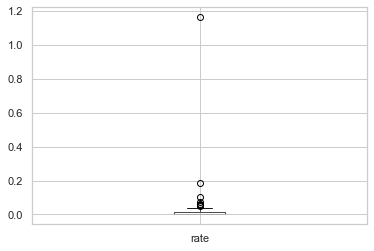

In [83]:
data_set.boxplot(column='rate')

In [160]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score == 0:
        return 'negative'
    elif score > 0:
        return 'positive'
    else:
        return 'positive'

In [161]:
data_set['union'] = data_set['rate'].apply(analysis)
data_set.head()

,user_id,rate,union
0,@AfricanGual,0.005305,positive
1,@BGutiier,0.000000,negative
2,@BobPersis,0.014286,positive
3,@Brian_TCorbett,0.000000,negative
4,@CasperMontoya13,0.000000,negative


In [162]:
dataset['polarity_union'] = dataset['Polarity'].apply(analysis)
dataset.head()

,parentid,sentiment,Polarity,Analysis,union,polarity_union
1,@POTUS,positive,-0.033333,negative,None,positive
2,@mubazieric,positive,0.305682,positive,None,positive
3,@JudithO65763855,positive,0.000000,positive,None,negative
4,@PearlyB57,negative,0.312500,positive,None,positive
5,@NoMoreblaa,negative,-0.250850,negative,None,positive


In [139]:
data_set.shape

(62, 3)

In [140]:
dataset.shape

(63, 6)

In [152]:
#for i in range(63):
 #   for j in range(62):
 #       a=data_set.user_id[j]
  #      b=dataset.parentid[i]
   #     if (a==b):
    #        k=str(data_set.rate[j])
    #        l=str(data_set.union[j])
    #        datset.polarity_union[i]=k
    #        datset.union[i]=l

In [148]:
def analysis(score):
    if score == 'negative':
        return 
    elif score == 'positive':
        return 
    else:
        return 0

In [149]:
dataset['union'] = dataset['union'].apply(analysis)
dataset['polarity_union'] = dataset['polarity_union'].apply(analysis)

dataset.head()

,parentid,sentiment,Polarity,Analysis,union,polarity_union
1,@POTUS,positive,-0.033333,negative,None,None
2,@mubazieric,positive,0.305682,positive,None,None
3,@JudithO65763855,positive,0.000000,positive,None,None
4,@PearlyB57,negative,0.312500,positive,None,None
5,@NoMoreblaa,negative,-0.250850,negative,None,None


In [163]:
data_set.head(60)

,user_id,rate,union
0,@AfricanGual,0.005305,positive
1,@BGutiier,0.000000,negative
2,@BobPersis,0.014286,positive
3,@Brian_TCorbett,0.000000,negative
4,@CasperMontoya13,0.000000,negative
5,@Chris72436709,0.000000,negative
6,@Christi49714219,0.000000,negative
7,@ClydeSenpai,0.008065,positive
8,@EarlyWatchWI,0.034091,positive
9,@GaryCravens9,0.105263,positive


In [154]:
dataset.head(60)

,parentid,sentiment,Polarity,Analysis,union,polarity_union
1,@POTUS,positive,-0.033333,negative,None,None
2,@mubazieric,positive,0.305682,positive,None,None
3,@JudithO65763855,positive,0.000000,positive,None,None
4,@PearlyB57,negative,0.312500,positive,None,None
5,@NoMoreblaa,negative,-0.250850,negative,None,None
6,@abbyshrader,neural,0.080000,positive,None,None
7,@billyfens,positive,0.375000,positive,None,None
8,@BobPersis,neural,0.200000,positive,None,None
9,@WaitingOnBiden,negative,-0.250000,negative,None,None
10,@crisbier,positive,-0.150000,negative,None,None


In [ ]:
#for i in range(63):
 #   for j in range(62):
 #       a=data_set.user_id[j]
  #      b=dataset.parentid[i]
   #     if (a==b):
    #        k=str(data_set.rate[j])
    #        l=str(data_set.union[j])
    #        datset.polarity_union[i]=k
    #        datset.union[i]=l

In [84]:
data_set['rate'].mean()

0.03356275711886325

In [85]:
data_set.shape

(62, 2)

In [86]:
#dataset.shape

In [87]:
for i in range(61):
    if()

SyntaxError: invalid syntax (<ipython-input-87-72ab21309685>, line 2)

In [88]:
for i in range(62):
 #   i=i+1
    a=df.parentid[i]
    for j in range(61):
        b=data_set.id[j]
        if (a==b):
            k=df.Polarity[i]
            l=data_set.list_follower[j]
            u=k+l
            df['Polarity'][i]=u

NameError: name 'df' is not defined

In [89]:
dataset['parentid'][1]

'@POTUS'

In [90]:
data_set['user_id'][0]

'@AfricanGual'

In [91]:
dataset.parentid[1]

'@POTUS'

In [92]:
dataset.head()

,parentid,sentiment,Polarity,Analysis
1,@POTUS,positive,-0.033333,negative
2,@mubazieric,positive,0.305682,negative
3,@JudithO65763855,positive,0.000000,negative
4,@PearlyB57,negative,0.312500,negative
5,@NoMoreblaa,negative,-0.250850,negative


In [93]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score <0:
        return 'negative'
    elif score == 0:
        return 'positive'
    else:
        return 'positive'

In [94]:
dataset['final'] = dataset['Polarity'].apply(analysis)
dataset.head()

,parentid,sentiment,Polarity,Analysis,final
1,@POTUS,positive,-0.033333,negative,negative
2,@mubazieric,positive,0.305682,negative,positive
3,@JudithO65763855,positive,0.000000,negative,positive
4,@PearlyB57,negative,0.312500,negative,positive
5,@NoMoreblaa,negative,-0.250850,negative,negative


In [95]:
dataset['Polarity'].mean()

0.06828103373383983

In [96]:
dataset['Polarity'].median()

0.0

In [97]:
dataset['Polarity'].mode()

0    0.0
dtype: float64

In [98]:
for i in range(63):
    i=i+1
    a=dataset.sentiment[i]
    b='neural'
    if (a==b):
        dataset.sentiment[i]='positive'

In [99]:
dataset.parentid[1]

'@POTUS'

In [100]:
data_set.head(60)

,user_id,rate
0,@AfricanGual,0.005305
1,@BGutiier,0.000000
2,@BobPersis,0.014286
3,@Brian_TCorbett,0.000000
4,@CasperMontoya13,0.000000
5,@Chris72436709,0.000000
6,@Christi49714219,0.000000
7,@ClydeSenpai,0.008065
8,@EarlyWatchWI,0.034091
9,@GaryCravens9,0.105263


In [101]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Accuracy Score:', accuracy_score(dataset['sentiment'],dataset['final']))
print('Precision Score:', precision_score(dataset['sentiment'], dataset['final'], average='macro'))
print('Recall Score:', recall_score(dataset['sentiment'], dataset['final'], average='macro'))
print('F1 Score:', f1_score(dataset['sentiment'], dataset['final'], average='macro'))

Accuracy Score: 0.5079365079365079
Precision Score: 0.5465425531914894
Recall Score: 0.5357142857142857
F1 Score: 0.4894117647058824


In [102]:
#dataset.to_csv('data_set.csv')

In [103]:
dataset.head(60)

,parentid,sentiment,Polarity,Analysis,final
1,@POTUS,positive,-0.033333,negative,negative
2,@mubazieric,positive,0.305682,negative,positive
3,@JudithO65763855,positive,0.000000,negative,positive
4,@PearlyB57,negative,0.312500,negative,positive
5,@NoMoreblaa,negative,-0.250850,negative,negative
6,@abbyshrader,positive,0.080000,negative,positive
7,@billyfens,positive,0.375000,negative,positive
8,@BobPersis,positive,0.200000,negative,positive
9,@WaitingOnBiden,negative,-0.250000,negative,negative
10,@crisbier,positive,-0.150000,negative,negative


In [104]:
dataset['Polarity'].mean()

0.06828103373383983

In [105]:
a=dataset['Polarity'].min()
a

-0.8

In [106]:
b=dataset['Polarity'].max()
b

0.7

In [107]:
c=b/a

In [108]:
c

-0.8749999999999999

In [109]:
a
b

0.7

In [110]:
df=pd.read_csv('new.csv')

In [111]:
df.head(10)

,Unnamed: 0,parentid,tweet_clean,sentiment,POS tagged,POStagged,Lemma,Polarity,Analysis
0,1,@POTUS,"When we took office, we didn�??t waste a secon...",positive,"[('took', 'v'), ('office', 'n'), (',', None), ...","[('took', 'v'), ('office', 'n'), (',', None), ...","take office , didn� ? ? waste second get pan...",-0.033333,negative
1,2,@mubazieric,The economy created more than 1.3 million new ...,positive,"[('economy', 'n'), ('created', 'v'), ('1.3', N...","[('economy', 'n'), ('created', 'v'), ('1.3', N...",economy create 1.3 million new job 100 day ....,0.305682,negative
2,3,@JudithO65763855,I'm so grateful the Biden Administration has m...,positive,"[(""'m"", 'v'), ('grateful', 'a'), ('Biden', 'n'...","[(""'m"", 'v'), ('grateful', 'a'), ('Biden', 'n'...",'m grateful Biden Administration make get pa...,0.000000,negative
3,4,@PearlyB57,Build Back Better!,negative,"[('Build', 'n'), ('Back', 'n'), ('Better', 'n'...","[('Build', 'n'), ('Back', 'n'), ('Better', 'n'...",Build Back Better !,0.312500,negative
4,5,@NoMoreblaa,I�m scared for America�s foundational rights. ...,negative,"[('I�m', 'n'), ('scared', 'v'), ('America�s', ...","[('I�m', 'n'), ('scared', 'v'), ('America�s', ...",I�m scar America�s foundational right . feel...,-0.250850,negative
5,6,@abbyshrader,Can we please open the borders to low-risk cou...,neural,"[('please', 'v'), ('open', 'v'), ('borders', '...","[('please', 'v'), ('open', 'v'), ('borders', '...",please open border low-risk country like UK/...,0.080000,negative
6,7,@billyfens,Sir. I'm happy your administration has accompl...,positive,"[('Sir', 'n'), ('.', None), (""'m"", 'v'), ('hap...","[('Sir', 'n'), ('.', None), (""'m"", 'v'), ('hap...",Sir . 'm happy administration accomplish muc...,0.375000,negative
7,8,@BobPersis,Other Western countries regulate drug prices. ...,neural,"[('Western', 'a'), ('countries', 'n'), ('regul...","[('Western', 'a'), ('countries', 'n'), ('regul...",Western country regulate drug price . U.S. r...,0.200000,negative
8,9,@WaitingOnBiden,"We never got the $2,000 checks, nationwide mas...",negative,"[('never', 'r'), ('got', 'v'), ('$', None), ('...","[('never', 'r'), ('got', 'v'), ('$', None), ('...","never get $ 2,000 check , nationwide mask ma...",-0.250000,negative
9,10,@crisbier,Yes!! Country turning a corner after a dark 4 ...,positive,"[('Yes', None), ('!', None), ('!', None), ('Co...","[('Yes', None), ('!', None), ('!', None), ('Co...",Yes ! ! Country turn corner dark 4 year,-0.150000,negative


In [112]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('tweet_clean',axis=1,inplace=True)
df.drop('POStagged',axis=1,inplace=True)
df.drop('Lemma',axis=1,inplace=True)
df.drop('POS tagged',axis=1,inplace=True)


In [113]:
for i in range(62):
    a=df.parentid[i]
    for j in range(61):
        b=data_set.id[j]
        if (a==b):
            k=df.Polarity[i]
            l=data_set.list_follower[j]
            if (l>0):
                u=k+1
                df['Polarity'][i]=u

AttributeError: 'DataFrame' object has no attribute 'id'

In [114]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [115]:
# Import Keras libraries
#from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
# Import CF Model Architecture
#from CFModel import CFModel

In [48]:
s

,parentid,sentiment,POStagged,Lemma,Polarity,Analysis
0,@POTUS,positive,1.166667,0,-0.033333,negative
1,@mubazieric,positive,0.583333,0,0.305682,positive
2,@JudithO65763855,positive,0.333333,0,0.000000,positive
3,@PearlyB57,negative,0.333333,0,0.312500,positive
4,@NoMoreblaa,negative,0.0,0,-0.250850,negative
...,...,...,...,...,...,...
58,@PMFLeia,negative,0.083333,0,0.100000,positive
59,@SBeekeeper,positive,0.0,0,0.350000,positive
60,@RedPillChannel,negative,0.0,0,-0.200000,negative
61,@eegorebeaver,positive,0.416667,0,0.000000,positive


In [27]:
f=pd.read_csv('rtr.csv')

In [28]:
s=pd.read_csv('new.csv')

In [47]:
s.head(60)

,parentid,sentiment,POStagged,Lemma,Polarity,Analysis
0,@POTUS,positive,1.166667,0,-0.033333,negative
1,@mubazieric,positive,0.583333,0,0.305682,positive
2,@JudithO65763855,positive,0.333333,0,0.000000,positive
3,@PearlyB57,negative,0.333333,0,0.312500,positive
4,@NoMoreblaa,negative,0.0,0,-0.250850,negative
5,@abbyshrader,neural,0.5,0,0.080000,positive
6,@billyfens,positive,0.583333,0,0.375000,positive
7,@BobPersis,neural,0.083333,0,0.200000,positive
8,@WaitingOnBiden,negative,0.166667,0,-0.250000,negative
9,@crisbier,positive,0.166667,0,-0.150000,negative


In [30]:
f.head(2)

,id,list_follower,final
0,@AfricanGual,2,0.166667
1,@BGutiier,0,0.000000


In [31]:
s.drop('Unnamed: 0',axis=1,inplace=True)
s.drop('tweet_clean',axis=1,inplace=True)
s.drop('POS tagged',axis=1,inplace=True)

In [32]:
s.POStagged[0]=1

In [33]:
s.shape

(63, 6)

In [34]:
f.shape

(62, 3)

In [35]:
for i in range(63):
    a=s.parentid[i]
    for j in range(62):
        b=f.id[j]
        if(a==b):
            s.POStagged[i]=f.final[j]
     #   else:
     #       s.POStagged[i]=0.30
     #       print(i,j)

In [41]:
for i in range(63):
    s.Lemma[i]=float(s.POStagged[i])+float(s.Polarity[i])

ValueError: could not convert string to float: "[('@', 'a'), ('POTUS', 'n'), ('want', 'v'), ('actually', 'r'), ('physically', 'r'), ('SEE', 'n'), ('type', 'v'), ('tweet', 'n'), ('.', None), ('bet', 'r'), ('1000', None), ('%', 'n'), ('could', None), ('.', None), ('look', 'v'), ('forward', 'r'), ('seeing', 'v'), ('next', 'a'), ('tweet', 'n'), ('staff', 'n'), ('sends', 'v'), ('.', None), ('BTW', None), (':', None), ('typed', 'v'), ('.', None)]"

In [46]:
for i in range(63):
    s.Lemma[i]=0

In [42]:
for i in range(63):
    s.POStagged[i]=0

In [43]:
for i in range(63):
    a=s.parentid[i]
    for j in range(62):
        b=f.id[j]
        if(a==b):
            s.POStagged[i]=f.final[j]
     #   else:
     #       s.POStagged[i]=0.30
     #       print(i,j)

In [44]:
for i in range(63):
    s.Lemma[i]=float(s.POStagged[i])+float(s.Polarity[i])